<a href="https://colab.research.google.com/github/innovatorved/learn-tensorflow/blob/master/tf3_fashion_mnist_analyse_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

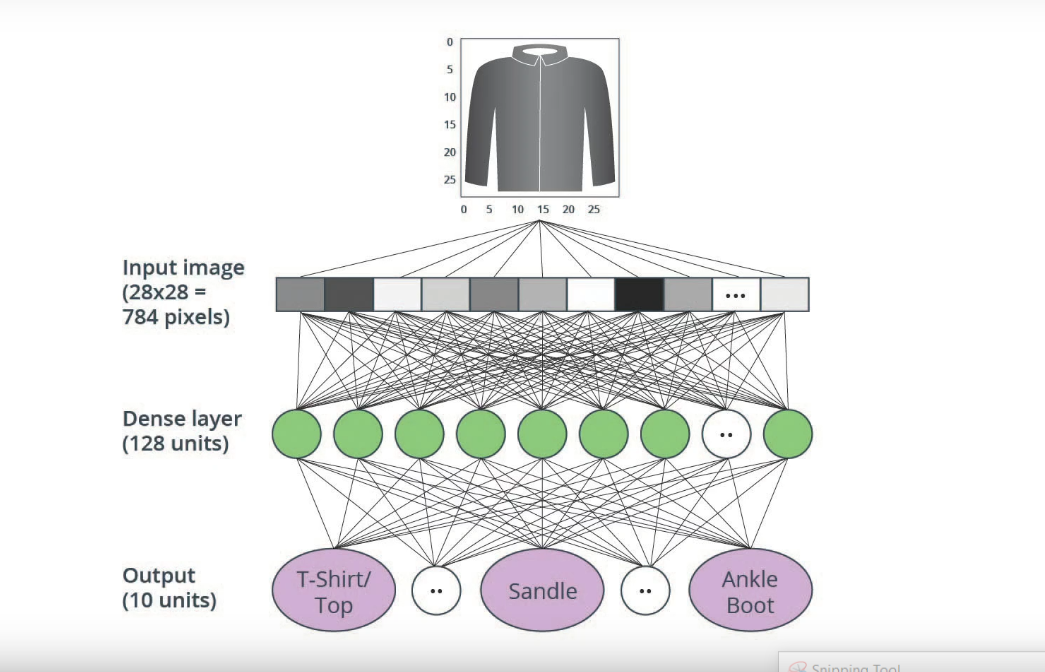

In [ ]:
#@title Install Dependies
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install tensorflow_datasets

In [ ]:
import numpy as np
import math
import cv2
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# from google.colab.patches import cv2_imshow

In [ ]:
dataset , metadata = tfds.load("fashion_mnist" , as_supervised=True , with_info=True)
dataset_train = dataset["train"]
dataset_test = dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete54B2SQ/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete54B2SQ/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# least of labels
dataset_labels = metadata.features["label"].names
print(f"Labesl : {repr(dataset_labels)}")

Labesl : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# extract lenght of test and train data
len_test = metadata.splits["test"].num_examples
len_train = metadata.splits["train"].num_examples
print(f"Size of train Data : {len_test} && Size of test Data : {len_train}")

Size of train Data : 10000 && Size of test Data : 60000


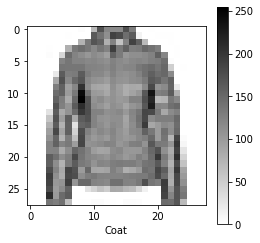

In [ ]:
# see the image of first index

for img , label in dataset_test.take(1):
  pass

# print(img.numpy().shape) # (28, 28, 1)
# change in to 2 D

plt.figure(figsize=(4,4))
plt.imshow(img.numpy().reshape(28,28), cmap = plt.cm.binary)
plt.colorbar()
plt.xlabel(dataset_labels[label])
plt.show()


**Normalize test and train Data**

In [ ]:
# Normalize the data 
def normalize(img , label=None):
  """Change img in scale of 0 to 1 from 0 to 255"""
  img = tf.cast(img , tf.float32)
  img /=255
  if label == None:
    return img
  return img , label

dataset_train = dataset_train.map(normalize)
dataset_test = dataset_test.map(normalize)


## **create a model**

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(128 , activation=tf.nn.relu),
                             tf.keras.layers.Dense(10 , activation=tf.nn.softmax)
                          ])

In [ ]:
# compile model
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

## **Fit the model**

In [ ]:
batch_size = 1
dataset_train = dataset_train.cache().repeat().shuffle(len_train).batch(batch_size)
dataset_test = dataset_test.cache().batch(batch_size)

In [ ]:
steps_per_epoche_int = math.ceil(len_train/batch_size) # epoche step for train data

model_history = model.fit(dataset_train , epochs = 2 , steps_per_epoch = steps_per_epoche_int)

Epoch 1/2
60000/60000 [==============================] - 93s 1ms/step - loss: 0.4946 - accuracy: 0.8235
Epoch 2/2
60000/60000 [==============================] - 87s 1ms/step - loss: 0.4138 - accuracy: 0.8554


## **Evaluate Accuracy of Model with test dataset**

In [ ]:
step_per_epoche_int_test = math.ceil(len_test/batch_size)


loss , accuracy = model.evaluate(dataset_test , steps = step_per_epoche_int_test)
print(f" Accuracy : {accuracy} && Loss {loss}")


10000/10000 [==============================] - 11s 1ms/step - loss: 0.4541 - accuracy: 0.8438
 Accuracy : 0.8438000082969666 && Loss 0.4540650248527527


## **Predict the label for image**

In [ ]:
for test_img , test_label in dataset_test.take(1):
  print(test_img.shape)
  test_img = test_img.numpy()
  test_label = test_label.numpy()

# ---------------------------------------------------------
predictions = model.predict(test_img)
print(test_img.shape,type(test_img))

(1, 28, 28, 1)
(1, 28, 28, 1) <class 'numpy.ndarray'>


predict_label_index : 4


Text(0.5, 0, 'Predict label : Coat && Actual label : Coat ')

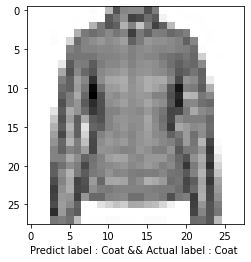

In [ ]:
# print(predictions[0])
predict_label_index = np.argmax(predictions[0])
print(f"predict_label_index : {predict_label_index}")

plt.imshow(test_img.reshape(28,28) , cmap = plt.cm.binary)
plt.xlabel(f"Predict label : {dataset_labels[predict_label_index]} && Actual label : {dataset_labels[test_label[0]]} ")

##**check**

Check for the Fashion image in test Data
Enter the number from 1 to 10000 to check for an image
Number Represent the image in Test DataSet 


Check for the Fashion image in test Data
Enter the number from 1 to 10000 to check for an image
Number Represent the image in Test DataSet 

Enter :665
(1, 28, 28, 1)
[[1.9458132e-05 4.9944284e-09 9.1343530e-02 5.1756565e-06 8.9019203e-01
  7.5975425e-21 1.8439099e-02 1.6545576e-27 7.6646882e-07 1.6817135e-15]]


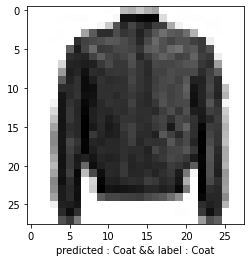

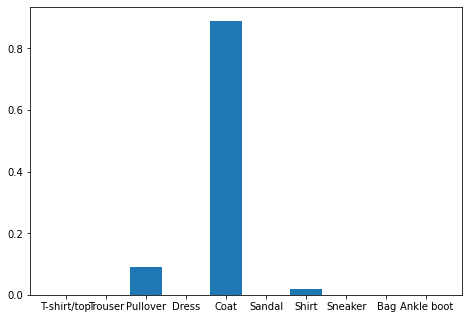

In [ ]:
# model is not perfetly correct
print("Check for the Fashion image in test Data\nEnter the number from 1 to 10000 to check for an image\nNumber Represent the image in Test DataSet ")
n = int(input("\nEnter :"))
for test_img , test_label in dataset_test.take(n):
  test_img = test_img.numpy()
  test_label = test_label.numpy()

# prediction
print(test_img.shape)
pre = model.predict(test_img)
print(pre)
max_index = np.argmax(pre)

test_img = test_img.reshape(28,28)
test_img = normalize(test_img)


plt.imshow(test_img , cmap = plt.cm.binary)
plt.xlabel(f"predicted : {dataset_labels[max_index]} && label : {dataset_labels[test_label[0]]}")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dataset_labels,pre[0])
plt.show()

## predict your cloths

In [ ]:
#@title incomplete
object_url = "https://images-na.ssl-images-amazon.com/images/I/41A-ay1ftrL.jpg"
import requests
with open("object.jpg" , "wb") as f:
  f.write(requests.get(object_url).content)

img = cv2.imread("object.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
# show image
plt.imshow(img , cmap = "gray")
plt.colorbar()
plt.xlabel(f"Shape : {img.shape}")
plt.show()

!rm object.jpg
img = tf.compat.v1.image.resize(
    img.reshape(500,500,1), (28,28), align_corners=False,
    preserve_aspect_ratio=False, name=None
)